In [1]:
library(dbConnect)
library(splitstackshape)
library(RMySQL)
library(igraph)

Loading required package: RMySQL
Loading required package: DBI
Loading required package: gWidgets
Loading required package: data.table

Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



In [ ]:
con<-dbConnect(MySQL(),user="GenBankUser", password="123GenBank456",host="metadatalab.syr.edu", dbname="genbank")


In [31]:
start.time <- Sys.time()
ref<-dbGetQuery(con,"SELECT r.id, r.authors, r.title, r.journal, r.year, COUNT(*) 
                    FROM genbank.Reference as r GROUP BY r.journal
                    LIMIT 100000;")
end.time <- Sys.time()
time.taken <- end.time - start.time
time.taken
#Be careful not to run this repeatedly. 

Time difference of 41.51537 secs

In [ ]:
dim(ref)
ref[1:3, ] #check the first 3 rows 

[1] "id"      "authors" "title"   "journal" "year"    "count"

[1] "Var1" "Freq"

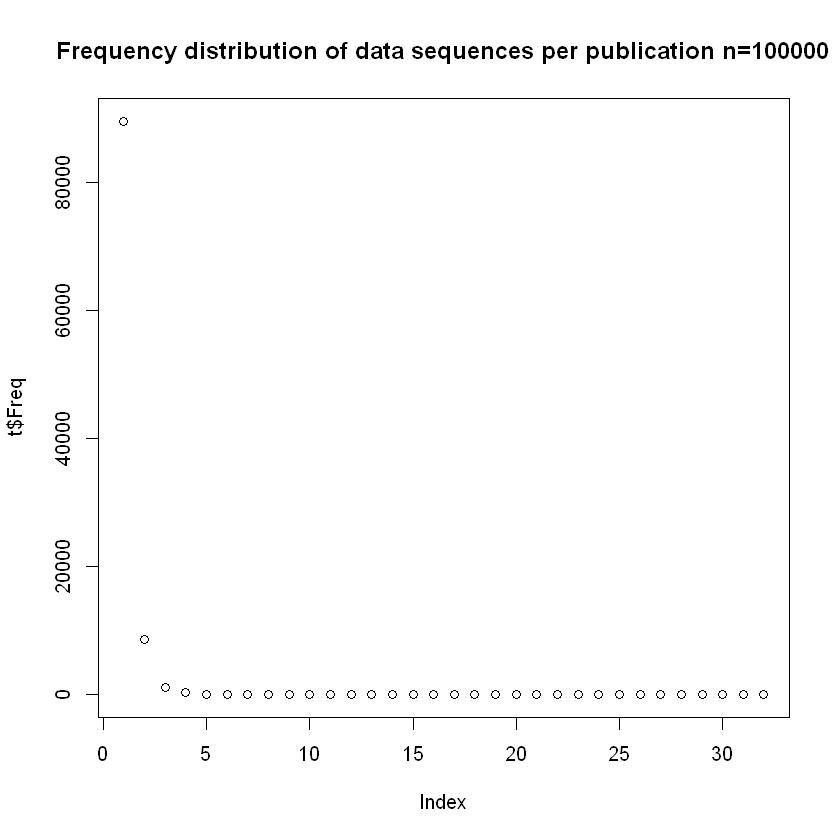

In [29]:
ref[1,]<-NULL #get rid of the NULLS

colnames(ref)[6]<-"count"
colnames(ref)
t<-table(ref$count)
t<-data.frame(t)
colnames(t)
plot(t$Freq, main="Frequency distribution of data sequences per publication n=100000")

In [17]:
authors=c("Turner,G.","Barredo,J.L., Cantoral,J.M., Alvarez,E., Diez,B. and Martin,J.F.",
"Farell,R., Gelep,P., Anilionis,A., Javaherian,K., Maione,T.E.,Rusche,J.R., Sadownick,B.A. and Jackson,J.A.",
"Diez,B., Barredo,J.L., Alvarez,E., Cantoral,J.M., van Solingen,P.,Groenen,M.A., Veenstra,A.E. and Martin,J.F.",
"van Solingen,P., Muurling,H., Koekman,B. and van den Berg,J.","Van Solingen,P.","Cantoral,J.M., Barredo,J.L., 
Alvarez,E., Diez,B. and Martin,J.F.")
length(authors)

[1] 7

In [10]:
title=c("Direct Submission","Cloning, sequence analysis and transcriptional study of the isopenicillin N synthase of Penicillium chrysogenum AS-P-78",
" ","Two genes involved in penicillin biosynthesis are linked in a 5.1 kb SalI fragment in the genome of Penicillium chrysogenum",
"Sequence of the Penicillium chrysogenum phosphoglycerate kinase gene",
"Direct Submission", "Nucleotide sequence of the Penicillium chrysogenum pyrG (orotidine-5'-phosphate decarboxylase) gene")
length(t)

[1] 1

In [11]:
journal=c("Submitted (06-AUG-1990) Turner G., Dept. of Molecular Biology & Biotechnology, Western Bank, Sheffield S10 2TN, UK",
"Mol. Gen. Genet. 216 (1), 91-98 (1989)",
"Unpublished","Mol. Gen. Genet. 218 (3), 572-576 (1989)", "Nucleic Acids Res. 16 (24), 11823 (1988)",
"Submitted (31-OCT-1988) Van Solingen P., Royal Gist Brocades NV,Department of Yeast and Fungal Genetics, PO Box 1, 2600 MA Delft,The Netherlands",
"Nucleic Acids Res. 16 (16), 8177 (1988)")
#data check. 

year=c("1990","1989","NA",
"1989",
"1988",
"1988",
"1988")


In [18]:
df=data.frame(authors, title,journal,year)
df

authors,title,journal,year
"Turner,G.",Direct Submission,"Submitted (06-AUG-1990) Turner G., Dept. of Molecular Biology & Biotechnology, Western Bank, Sheffield S10 2TN, UK",1990
"Barredo,J.L., Cantoral,J.M., Alvarez,E., Diez,B. and Martin,J.F.","Cloning, sequence analysis and transcriptional study of the isopenicillin N synthase of Penicillium chrysogenum AS-P-78","Mol. Gen. Genet. 216 (1), 91-98 (1989)",1989
"Farell,R., Gelep,P., Anilionis,A., Javaherian,K., Maione,T.E.,Rusche,J.R., Sadownick,B.A. and Jackson,J.A.",,Unpublished,NA
"Diez,B., Barredo,J.L., Alvarez,E., Cantoral,J.M., van Solingen,P.,Groenen,M.A., Veenstra,A.E. and Martin,J.F.",Two genes involved in penicillin biosynthesis are linked in a 5.1 kb SalI fragment in the genome of Penicillium chrysogenum,"Mol. Gen. Genet. 218 (3), 572-576 (1989)",1989
"van Solingen,P., Muurling,H., Koekman,B. and van den Berg,J.",Sequence of the Penicillium chrysogenum phosphoglycerate kinase gene,"Nucleic Acids Res. 16 (24), 11823 (1988)",1988
"Van Solingen,P.",Direct Submission,"Submitted (31-OCT-1988) Van Solingen P., Royal Gist Brocades NV,Department of Yeast and Fungal Genetics, PO Box 1, 2600 MA Delft,The Netherlands",1988
"Cantoral,J.M., Barredo,J.L., Alvarez,E., Diez,B. and Martin,J.F.",Nucleotide sequence of the Penicillium chrysogenum pyrG (orotidine-5'-phosphate decarboxylase) gene,"Nucleic Acids Res. 16 (16), 8177 (1988)",1988


In [14]:
#Transpose the authors into a format for iGraph analysis
Journal=as.data.frame(journal)


journal
"Submitted (06-AUG-1990) Turner G., Dept. of Molecular Biology & Biotechnology, Western Bank, Sheffield S10 2TN, UK"
"Mol. Gen. Genet. 216 (1), 91-98 (1989)"
Unpublished
"Mol. Gen. Genet. 218 (3), 572-576 (1989)"
"Nucleic Acids Res. 16 (24), 11823 (1988)"
"Submitted (31-OCT-1988) Van Solingen P., Royal Gist Brocades NV,Department of Yeast and Fungal Genetics, PO Box 1, 2600 MA Delft,The Netherlands"
"Nucleic Acids Res. 16 (16), 8177 (1988)"


In [39]:
df.auths<-df
df.auths<-as.data.table(df.auths)
class(df.auths)
df.auths$authors<- gsub(" and",",", df.auths$authors)
df.auths$authors <- gsub(" and ",",", df.auths$authors)
df.auths$authors <- gsub("and ",",", df.auths$authors)

#substitute for the three variants in formatting for the author names. 
colnames(df.auths)


[1] "data.table" "data.frame"

[1] "authors" "title"   "journal" "year"

authors,title,journal,year
"Turner,G.",Direct Submission,"Submitted (06-AUG-1990) Turner G., Dept. of Molecular Biology & Biotechnology, Western Bank, Sheffield S10 2TN, UK",1990
"Barredo,J.L., Cantoral,J.M., Alvarez,E., Diez,B., Martin,J.F.","Cloning, sequence analysis and transcriptional study of the isopenicillin N synthase of Penicillium chrysogenum AS-P-78","Mol. Gen. Genet. 216 (1), 91-98 (1989)",1989
"Farell,R., Gelep,P., Anilionis,A., Javaherian,K., Maione,T.E.,Rusche,J.R., Sadownick,B.A., Jackson,J.A.",,Unpublished,NA
"Diez,B., Barredo,J.L., Alvarez,E., Cantoral,J.M., van Solingen,P.,Groenen,M.A., Veenstra,A.E., Martin,J.F.",Two genes involved in penicillin biosynthesis are linked in a 5.1 kb SalI fragment in the genome of Penicillium chrysogenum,"Mol. Gen. Genet. 218 (3), 572-576 (1989)",1989
"van Solingen,P., Muurling,H., Koekman,B., van den Berg,J.",Sequence of the Penicillium chrysogenum phosphoglycerate kinase gene,"Nucleic Acids Res. 16 (24), 11823 (1988)",1988
"Van Solingen,P.",Direct Submission,"Submitted (31-OCT-1988) Van Solingen P., Royal Gist Brocades NV,Department of Yeast and Fungal Genetics, PO Box 1, 2600 MA Delft,The Netherlands",1988
"Cantoral,J.M., Barredo,J.L., Alvarez,E., Diez,B., Martin,J.F.",Nucleotide sequence of the Penicillium chrysogenum pyrG (orotidine-5'-phosphate decarboxylase) gene,"Nucleic Acids Res. 16 (16), 8177 (1988)",1988


In [42]:
df.auths$type<-'publication' 
df.auths[grep('Submitted',df.auths$journal),]$type<-'submission'
df.auths[grep('Unpublished',df.auths$journal),]$type<-'Unpublished'
df.auths[grep('In press',df.auths$journal),]$type<-'In press'
df.auths

authors,title,journal,year,type
"Turner,G.",Direct Submission,"Submitted (06-AUG-1990) Turner G., Dept. of Molecular Biology & Biotechnology, Western Bank, Sheffield S10 2TN, UK",1990,submission
"Barredo,J.L., Cantoral,J.M., Alvarez,E., Diez,B., Martin,J.F.","Cloning, sequence analysis and transcriptional study of the isopenicillin N synthase of Penicillium chrysogenum AS-P-78","Mol. Gen. Genet. 216 (1), 91-98 (1989)",1989,publication
"Farell,R., Gelep,P., Anilionis,A., Javaherian,K., Maione,T.E.,Rusche,J.R., Sadownick,B.A., Jackson,J.A.",,Unpublished,NA,Unpublished
"Diez,B., Barredo,J.L., Alvarez,E., Cantoral,J.M., van Solingen,P.,Groenen,M.A., Veenstra,A.E., Martin,J.F.",Two genes involved in penicillin biosynthesis are linked in a 5.1 kb SalI fragment in the genome of Penicillium chrysogenum,"Mol. Gen. Genet. 218 (3), 572-576 (1989)",1989,publication
"van Solingen,P., Muurling,H., Koekman,B., van den Berg,J.",Sequence of the Penicillium chrysogenum phosphoglycerate kinase gene,"Nucleic Acids Res. 16 (24), 11823 (1988)",1988,publication
"Van Solingen,P.",Direct Submission,"Submitted (31-OCT-1988) Van Solingen P., Royal Gist Brocades NV,Department of Yeast and Fungal Genetics, PO Box 1, 2600 MA Delft,The Netherlands",1988,submission
"Cantoral,J.M., Barredo,J.L., Alvarez,E., Diez,B., Martin,J.F.",Nucleotide sequence of the Penicillium chrysogenum pyrG (orotidine-5'-phosphate decarboxylase) gene,"Nucleic Acids Res. 16 (16), 8177 (1988)",1988,publication


In [48]:
colnames(df.auths)
df.auths<- cSplit(df.auths, "authors", ".,",'wide')
df.auths<-as.data.frame(df.auths)

[1] "title"     "journal"   "year"      "type"      "authors_1" "authors_2"
 [7] "authors_3" "authors_4" "authors_5" "authors_6" "authors_7" "authors_8"

In [16]:
N<-df.auths
ref.years<- N$year
ref.type<-N$type
colnames(N)

ERROR: Error in eval(expr, envir, enclos): object 'df.auths' not found


In [15]:
N 

ERROR: Error in eval(expr, envir, enclos): object 'N' not found


In [7]:
N<-N[,c(5:12)] #We want JUST the authors.

#tmpN <- t(combn(N[1,!is.na(N[1,])], 2))
#df.N <- data.frame(Auth1 = unlist(tmpN[, 1]), Auth2 = unlist(tmpN[, 2]), stringsAsFactors = FALSE) 